In [5]:
import gzip
import json
import pandas as pd

In [9]:
import gzip
import json
import pandas as pd

# Load RNA-Seq data from the gzipped JSON file
dataset = '/dataset0.json.gz'
labels = '/data.info.labelled'

with gzip.open(dataset, 'rt', encoding='utf-8') as f:
    rna_data = [json.loads(line) for line in f]


In [10]:
labels_df = pd.read_csv(labels)

In [11]:
print("Label Data Preview:")
print(labels_df.head())
print("\nLabel Distribution:")
print(labels_df['label'].value_counts())

Label Data Preview:
           gene_id    transcript_id  transcript_position  label
0  ENSG00000004059  ENST00000000233                  244      0
1  ENSG00000004059  ENST00000000233                  261      0
2  ENSG00000004059  ENST00000000233                  316      0
3  ENSG00000004059  ENST00000000233                  332      0
4  ENSG00000004059  ENST00000000233                  368      0

Label Distribution:
label
0    116363
1      5475
Name: count, dtype: int64


In [12]:
print("\nRNA-Seq Data Preview (First Entry):")
print(rna_data[0])
print("\nTotal number of entries in RNA-Seq data:", len(rna_data))



RNA-Seq Data Preview (First Entry):
{'ENST00000000233': {'244': {'AAGACCA': [[0.00299, 2.06, 125.0, 0.0177, 10.4, 122.0, 0.0093, 10.9, 84.1], [0.00631, 2.53, 125.0, 0.00844, 4.67, 126.0, 0.0103, 6.3, 80.9], [0.00465, 3.92, 109.0, 0.0136, 12.0, 124.0, 0.00498, 2.13, 79.6], [0.00398, 2.06, 125.0, 0.0083, 5.01, 130.0, 0.00498, 3.78, 80.4], [0.00664, 2.92, 120.0, 0.00266, 3.94, 129.0, 0.013, 7.15, 82.2], [0.0103, 3.83, 123.0, 0.00598, 6.45, 126.0, 0.0153, 1.09, 74.8], [0.00398, 3.75, 126.0, 0.00332, 4.3, 129.0, 0.00299, 1.93, 81.9], [0.00498, 3.93, 127.0, 0.00398, 2.51, 131.0, 0.0111, 3.47, 79.4], [0.0139, 4.69, 106.0, 0.0136, 6.21, 124.0, 0.00531, 10.6, 85.5], [0.00631, 3.5, 126.0, 0.0222, 5.38, 128.0, 0.00332, 1.72, 79.3], [0.0061, 3.99, 121.0, 0.0121, 7.27, 122.0, 0.00232, 1.27, 78.9], [0.00299, 1.99, 128.0, 0.00427, 4.85, 124.0, 0.00332, 3.18, 80.5], [0.0186, 3.62, 124.0, 0.00428, 2.25, 129.0, 0.00554, 2.78, 80.1], [0.0093, 3.12, 125.0, 0.00398, 8.84, 129.0, 0.00361, 1.86, 82.0], [0.0

In [13]:
rows = []
for entry in rna_data:
    for transcript_id, positions in entry.items():
        for position, nucleotides in positions.items():
            for nucleotide, features in nucleotides.items():
                for feature_set in features:
                    row = [transcript_id, position, nucleotide] + feature_set
                    rows.append(row)

# Create DataFrame for RNA-Seq data
columns = ['transcript_id', 'position', 'nucleotide'] + [f'feature_{i+1}' for i in range(9)]  # Assuming there are 9 features
rna_df = pd.DataFrame(rows, columns=columns)

# Preview the RNA-Seq DataFrame
print("\nRNA-Seq DataFrame Preview:")
print(rna_df.head())


RNA-Seq DataFrame Preview:
     transcript_id position nucleotide  feature_1  feature_2  feature_3  \
0  ENST00000000233      244    AAGACCA    0.00299       2.06      125.0   
1  ENST00000000233      244    AAGACCA    0.00631       2.53      125.0   
2  ENST00000000233      244    AAGACCA    0.00465       3.92      109.0   
3  ENST00000000233      244    AAGACCA    0.00398       2.06      125.0   
4  ENST00000000233      244    AAGACCA    0.00664       2.92      120.0   

   feature_4  feature_5  feature_6  feature_7  feature_8  feature_9  
0    0.01770      10.40      122.0    0.00930      10.90       84.1  
1    0.00844       4.67      126.0    0.01030       6.30       80.9  
2    0.01360      12.00      124.0    0.00498       2.13       79.6  
3    0.00830       5.01      130.0    0.00498       3.78       80.4  
4    0.00266       3.94      129.0    0.01300       7.15       82.2  


In [14]:
print("\nSummary Statistics of RNA-Seq Data:")
print(rna_df.describe())
print("\nMissing Values in RNA-Seq Data:")
print(rna_df.isnull().sum())



Summary Statistics of RNA-Seq Data:
          feature_1     feature_2     feature_3     feature_4     feature_5  \
count  1.102711e+07  1.102711e+07  1.102711e+07  1.102711e+07  1.102711e+07   
mean   8.106457e-03  4.347531e+00  1.109025e+02  8.149364e-03  5.182957e+00   
std    5.411981e-03  2.577925e+00  1.192639e+01  5.301427e-03  3.008630e+00   
min    1.660000e-03  9.400000e-02  7.320000e+01  1.660000e-03  4.400000e-02   
25%    4.320000e-03  2.500000e+00  1.040000e+02  4.490000e-03  2.930000e+00   
50%    6.640000e-03  3.550000e+00  1.110000e+02  6.690000e-03  4.230000e+00   
75%    1.020000e-02  5.570000e+00  1.200000e+02  1.030000e-02  6.890000e+00   
max    1.200000e-01  2.060000e+02  1.530000e+02  1.380000e-01  2.060000e+02   

          feature_6     feature_7     feature_8     feature_9  
count  1.102711e+07  1.102711e+07  1.102711e+07  1.102711e+07  
mean   1.110816e+02  7.077341e-03  2.981141e+00  8.625382e+01  
std    1.302800e+01  4.385762e-03  1.699636e+00  5.556484e+

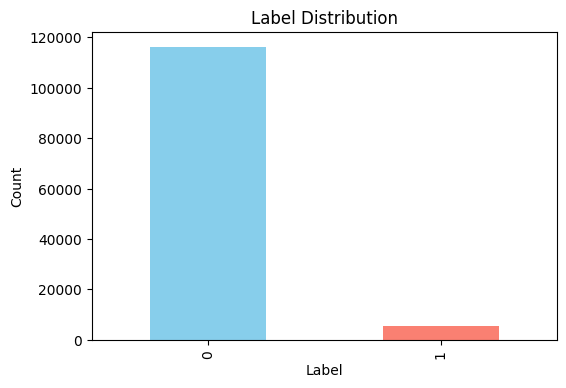

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
labels_df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

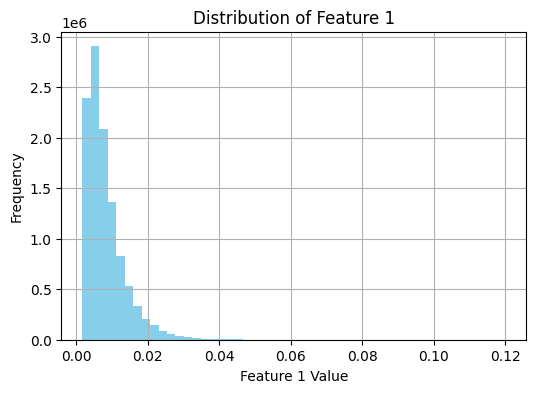

In [16]:
plt.figure(figsize=(6,4))
rna_df['feature_1'].hist(bins=50, color='skyblue')
plt.title('Distribution of Feature 1')
plt.xlabel('Feature 1 Value')
plt.ylabel('Frequency')
plt.show()